### Configuração de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [2]:
# Função para promover agilidade em analises.

def analise(coluna):
    
    # Transformando lista de constantes únicas e suas quantidades em string.
    
    constantes_unicas = ''
    
    for i in range(len(list(coluna.value_counts()))):          
        if   (i == 0):
            constantes_unicas += str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '",'
            
        elif (i == len(coluna.unique()) - 1):
            constantes_unicas += ' ' + str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '"'
            
        else:
            constantes_unicas += ' ' + str(list(coluna.value_counts())[i]) + ' "' + str(list(coluna.value_counts().index)[i]) + '",'
    
    # Análise dos dados
    
    print(f'Existem {coluna.nunique()} constantes únicas que são {constantes_unicas} e {coluna.isna().sum()} dados faltantes.')

In [3]:
# Fazendo diferenciação e união de planilhas

test['Modify'] = 'test'
train['Modify'] = 'train'

df_final = pd.DataFrame()

df_create = pd.concat([test, train])

df_create.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Modify,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN


#### Passengerld

A coluna "Passengerld" apenas escala de forma crescente, com o intervalo de 1 unidade. Logo, fica claro 
que a lógica dela não têm nenhuma interferência no comportamento de outras colunas, e conseguentemente
também não influenciará na probabilidade do passageiro sobreviver ou não.

#### Pclass

In [4]:
analise(df_create['Pclass'])

Existem 3 constantes únicas que são 709 "3", 323 "1", 277 "2" e 0 dados faltantes.


In [5]:
'''
Analisando a coluna, é nítido e notório que ela não precisa de nenhum tratamento estatístico 
de dados visto que existem poucas variáveis, e não nenhum dado faltantes.
'''

# Transformação das variáveis de "Pclass" em multiplas colunas que representam de      forma 
# binária os dados de cada uma delas.

Pclass = pd.get_dummies(df_create['Pclass'], prefix='Pclass')

df_final = Pclass

df_final.head(5)

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


#### Name

In [6]:
'''
Cada passageiro possui um nome diferente, logo, não faz sentido fazer uma análise geral   da 
coluna da forma que está. Porém, ao observar o nome dos passageiros nota-se que cada      um 
possui um pronome de tratamento, e estes tendem a se repetir. Então, faz mais        sentido 
classificar o nome dos passageiros com base neles, e aí sim fazer qualquer análise.
'''

# Separando pronomes de tratamento e transformando em coluna

Name = []

for i in df_create['Name']:
    Name.append(i.split(', ')[1].split('.')[0])
    
df_create['Pronoun'] = Name

analise(df_create['Pronoun'])

Existem 18 constantes únicas que são 757 "Mr", 260 "Miss", 197 "Mrs", 61 "Master", 8 "Rev", 8 "Dr", 4 "Col", 2 "Ms", 2 "Major", 2 "Mlle", 1 "Sir", 1 "the Countess", 1 "Capt", 1 "Don", 1 "Lady", 1 "Mme", 1 "Dona", 1 "Jonkheer" e 0 dados faltantes.


<Axes: xlabel='Pronoun', ylabel='count'>

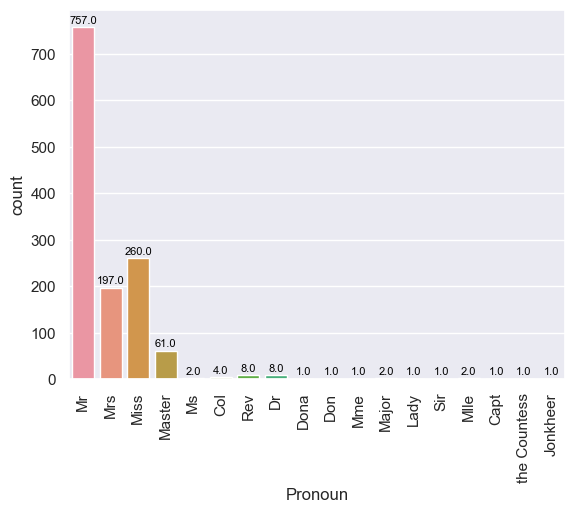

In [7]:
'''
Analisando os números, quatro pronomes de tratamento possuem a esmagadora maioria         de
participação nos dados em comparação aos restantes. Essa afirmação pode ser           melhor
visualizada em um gráfico de barras.
'''
# Plotando gráfico de barras de pronomes de tratamento

colunas_de_pronomes = sns.set(font_scale=1)
colunas_de_pronomes = sns.countplot(data=df_create, x='Pronoun')
colunas_de_pronomes.set_xticklabels(colunas_de_pronomes.get_xticklabels(), rotation=90)

for i in colunas_de_pronomes.patches:
    colunas_de_pronomes.annotate(f'{i.get_height()}', 
                     (i.get_x() + i.get_width() / 2., i.get_height()), 
                     ha='center', va='center', 
                     fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')

colunas_de_pronomes

In [8]:
'''
A depender do comportamento desses títulos que possuem aparições menores ou igual a    oito,
faz mais sentido os unir em apenas uma categória, algo como "outros".
'''

quantidades_de_p = df_create['Pronoun'].value_counts()

df_create[df_create['Pronoun'].isin(quantidades_de_p[quantidades_de_p <= 8].index)][['Pronoun', 'Survived']].value_counts(dropna=False)

Pronoun       Survived
Rev           0.0         6
Dr            0.0         4
              1.0         3
Col           NaN         2
Rev           NaN         2
Mlle          1.0         2
Capt          0.0         1
Major         1.0         1
Sir           1.0         1
Ms            NaN         1
              1.0         1
Mme           1.0         1
Lady          1.0         1
Major         0.0         1
Col           0.0         1
Jonkheer      0.0         1
Dr            NaN         1
Dona          NaN         1
Don           0.0         1
Col           1.0         1
the Countess  1.0         1
dtype: int64

In [9]:
'''
Analisando os dados, percebe-se que existem pronomes de tratamento citados que        apenas 
morreram, apenas viveram, e existem aqueles que as quantidades são divididas. Seria     mais 
lógico então resumir esses pronomes em apenas três, os com a taxa de mortalidade alta, baixa
e dividida.
'''

# Separando manualmente os pronomes de tratamento

df_create['Pronoun'] = df_create['Pronoun'].replace(['Capt', 'Don', 'Jonkheer', 'Rev'], 'Pronoun_0')
df_create['Pronoun'] = df_create['Pronoun'].replace(['Lady', 'Mme', 'Mlle', 'Sir', 'the Countess'], 'Pronoun_1')
df_create['Pronoun'] = df_create['Pronoun'].replace(['Col', 'Dona', 'Dr', 'Major', 'Ms'], 'Pronoun_0_1')

# Nova análise de nomes

analise(df_create['Pronoun'])

Existem 7 constantes únicas que são 757 "Mr", 260 "Miss", 197 "Mrs", 61 "Master", 17 "Pronoun_0_1", 11 "Pronoun_0", 6 "Pronoun_1" e 0 dados faltantes.


In [10]:
# Transformação das variáveis de "Pronoun" em multiplas colunas que representam de forma binária os dados
# da coluna "Name".

b_Name = pd.get_dummies(df_create['Pronoun'], prefix='Name')

df_final = pd.concat([df_final, b_Name], axis=1)

#### Sex

In [11]:
analise(df_create['Sex'])

Existem 2 constantes únicas que são 843 "male", 466 "female" e 0 dados faltantes.


In [12]:
'''
Nota-se que existem apenas duas constantes sem nenhum dado faltante, logo, fica claro    que
não há necessidade de nenhum tratamento de dados, a não ser transforma-los em binário.
'''

# Transformando constante da coluna "Sex" em binário

df_create['Sex'] = df_create['Sex'].replace(['male', 'female'], [0, 1])

df_final = pd.concat([df_final, df_create['Sex']], axis=1)

#### Age

In [13]:
analise(df_create['Age'])

Existem 98 constantes únicas que são 47 "24.0", 43 "22.0", 41 "21.0", 40 "30.0", 39 "18.0", 34 "25.0", 32 "28.0", 31 "36.0", 30 "26.0", 30 "29.0", 30 "27.0", 29 "19.0", 26 "23.0", 24 "32.0", 23 "35.0", 23 "20.0", 23 "31.0", 21 "33.0", 21 "45.0", 20 "17.0", 20 "39.0", 19 "16.0", 18 "42.0", 18 "40.0", 16 "34.0", 15 "50.0", 14 "38.0", 14 "48.0", 14 "47.0", 12 "2.0", 11 "41.0", 10 "1.0", 10 "9.0", 10 "44.0", 10 "4.0", 10 "54.0", 9 "37.0", 9 "43.0", 9 "49.0", 8 "55.0", 8 "14.0", 8 "51.0", 7 "3.0", 7 "60.0", 6 "6.0", 6 "8.0", 6 "52.0", 6 "15.0", 6 "58.0", 6 "46.0", 5 "64.0", 5 "57.0", 5 "13.0", 5 "61.0", 5 "5.0", 5 "62.0", 4 "7.0", 4 "53.0", 4 "56.0", 4 "11.0", 4 "32.5", 4 "10.0", 4 "63.0", 3 "0.75", 3 "0.83", 3 "28.5", 3 "59.0", 3 "40.5", 3 "65.0", 3 "12.0", 3 "18.5", 2 "71.0", 2 "34.5", 2 "45.5", 2 "14.5", 2 "36.5", 2 "0.92", 2 "70.0", 2 "30.5", 1 "23.5", 1 "80.0", 1 "20.5", 1 "24.5", 1 "0.42", 1 "0.67", 1 "26.5", 1 "55.5", 1 "70.5", 1 "66.0", 1 "38.5", 1 "0.17", 1 "0.33", 1 "11.5", 1 "60.

In [14]:
'''
Existem muitas idades diferentes, e ao mesmo tempo muitos dados faltantes. O caminho    mais 
lógico a se seguir é tentar estimar as idades faltantes com base na correlação   estatística 
dessa coluna, com as outras disponíveis.
'''

df_create.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428,-0.005007
Pclass,-0.038354,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629,-0.338481
Sex,-0.013406,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523,0.543351
Age,0.028814,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740,-0.077221
SibSp,-0.055224,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238,-0.035322
Parch,0.008942,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539,0.081629
Fare,0.031428,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000,0.257307
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


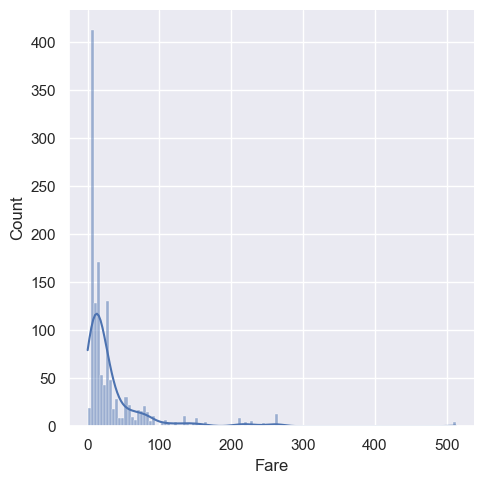

In [15]:
'''
As colunas que mais se correlacionam com "Age" são a "Pclass", "SibSp", "Parch" e    "Fare". 
Para preencher os dados faltantes, a melhor lógica a se seguir é tentar fazer médias, e para
aumentar a precisão dessas médias, elas serão calculadas com base em filtros das colunas que
se correlacionam. As colunas com excessão da "Fare" possuem poucas constantes únicas,  então 
para que seja viável utilizar essa última como filtro, faz-se necessária a classificação dos 
valores através de suas taxas.
'''

sns.displot(df_create['Fare'], kde=True)

P(x <= 0) = 17		P(x <= 1) = 17		P(x <= 2) = 17		P(x <= 3) = 17		
P(x <= 4) = 18		P(x <= 5) = 20		P(x <= 6) = 20		P(x <= 7) = 37		
P(x <= 8) = 360		P(x <= 9) = 461		P(x <= 10) = 491	P(x <= 11) = 531	
P(x <= 12) = 543	P(x <= 13) = 621	P(x <= 14) = 642	P(x <= 15) = 673	
P(x <= 16) = 716	P(x <= 17) = 731	P(x <= 18) = 739	P(x <= 19) = 744	
P(x <= 20) = 752	P(x <= 21) = 779	P(x <= 22) = 787	P(x <= 23) = 803	
P(x <= 24) = 812	P(x <= 25) = 821	P(x <= 26) = 882	P(x <= 27) = 917	
P(x <= 28) = 940	P(x <= 29) = 947	P(x <= 30) = 965	P(x <= 31) = 978	
P(x <= 32) = 997	P(x <= 33) = 1004	P(x <= 34) = 1005	P(x <= 35) = 1013	
P(x <= 36) = 1017	P(x <= 37) = 1021	P(x <= 38) = 1024	P(x <= 39) = 1032	
P(x <= 40) = 1044	P(x <= 41) = 1045	P(x <= 42) = 1049	P(x <= 43) = 1052	
P(x <= 44) = 1052	P(x <= 45) = 1052	P(x <= 46) = 1053	P(x <= 47) = 1061	
P(x <= 48) = 1063	P(x <= 49) = 1063	P(x <= 50) = 1068	P(x <= 51) = 1070	
P(x <= 52) = 1084	P(x <= 53) = 1088	P(x <= 54) = 1094	P(x <= 55) = 1096	
P(x <= 56) = 1102	P

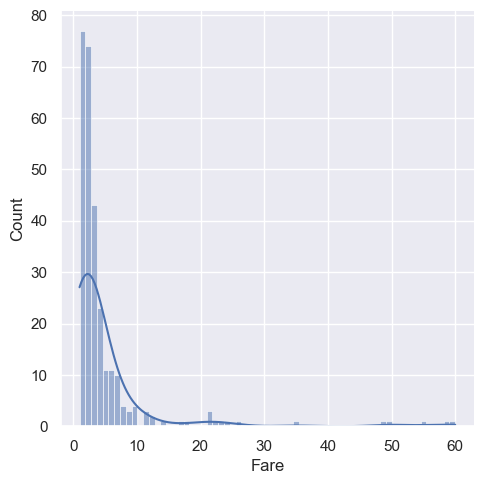

In [16]:
'''
Ao observar o gráfico, fica nítido que a grande maioria dos passageiros estão apenas  dentro 
de uma pequena faixa de valores, enquanto a minoria possui uma maior variação desses.   Para 
facilitar a análise é possível dividir esses valores em três categorias de acordo com      o 
número de passageiros:

A baixa, que pode ser compreendida como a média das taxas que atingem aproximadamente     50 
passageiros;

A razoável, que pode ser compreendida como a média das taxas que atingem números  superiores 
a 50 passageiros, e inferiores a aproximadamente 150 passageiros;

A alta, que pode ser compreendida como a média das taxas que atingem números superiores    a 
150 passageiros.

Para a partir de que número pegar de forma mais precisa, é importante observar a  progressão
dos dados.
'''

# Crescimento da quantidade de passageiros conforme o valor aumenta

c = 0

for i in range(101):
    if i < 10:
        print(f'P(x <= {i}) = {df_create[(df_create["Fare"] <= i)]["Fare"].value_counts().sum()}', end='\t\t')
        
    else:
        print(f'P(x <= {i}) = {df_create[(df_create["Fare"] <= i)]["Fare"].value_counts().sum()}', end='\t')
       
    c += 1
    
    if c == 4:
        c = 0
        print()

# Gráfico desse crescimento        

sns.displot(df_create["Fare"].value_counts(), kde=True)

In [17]:
'''
Analisando a forma como os dados se comportam, é possível aferir a partir de que momento  se 
iniciam as três classes porpostas:

- Baixa: Os passageiros com a taxa maior ou igual a 0 e menor ou igual a 6, e maior ou igual
a 32;
                                                                                            
- Razoável: Os passageiros com a taxa maior que 9 e menor que 32;                           
                                                                                            
- Alta: Os passageiros com a taxa maior que 6 e menor ou igual a 9.                         
                                                                                            
Agora basta calcular as médiasdas idades, de acordo com os filtros.
'''

Pclass_u = list(df_create["Pclass"].unique())
SibSp_u = list(df_create["SibSp"].unique())
Parch_u = list(df_create["Parch"].unique())

# Iterações para "Pclass"
for i in range(len(df_create["Pclass"].unique())):
    
    # Iterações para "SibSp"
    for j in range(len(df_create["SibSp"].unique())):
    
        # Iterações para "Parch"    
        for k in range(len(df_create["Parch"].unique())):
                    
            # Iterações para "Fare"
            
            filtro_nan = ((df_create["Pclass"] == Pclass_u[i]) & 
                          (df_create["SibSp"] == SibSp_u[j]) & 
                          (df_create["Parch"] == Parch_u[k]) &
                          (df_create['Age'].isna()))
            
            filtro_mean = ((df_create["Pclass"] == Pclass_u[i]) & 
                           (df_create["SibSp"] == SibSp_u[j]) & 
                           (df_create["Parch"] == Parch_u[k]))
            
            ##  Alto
            
            alto = (df_create["Fare"] > 6) & (df_create["Fare"] <= 9)

            df_create.loc[filtro_nan + alto, 'Age'] = df_create.loc[filtro_nan + alto, 'Age'].fillna(df_create.loc[filtro_mean + alto, 'Age'].mean())
            
            ## Razoável
            
            razoavel = (df_create["Fare"] > 9) & (df_create["Fare"] < 32)

            df_create.loc[filtro_nan + razoavel, 'Age'] = df_create.loc[filtro_nan + razoavel, 'Age'].fillna(df_create.loc[filtro_mean + razoavel, 'Age'].mean())

            ## Baixo
            
            baixo_06 = (df_create["Fare"] >= 0) & (df_create["Fare"] <= 6)
            
            df_create.loc[filtro_nan + baixo_06, 'Age'] = df_create.loc[filtro_nan + baixo_06, 'Age'].fillna(df_create.loc[filtro_mean + baixo_06, 'Age'].mean())

            baixo_32 = (df_create["Fare"] >= 32)
            
            df_create.loc[filtro_nan + baixo_32, 'Age'] = df_create.loc[filtro_nan + baixo_32, 'Age'].fillna(df_create.loc[filtro_mean + baixo_32, 'Age'].mean())
           
df_final = pd.concat([df_final, df_create['Age']], axis=1)

#### SibSp

In [18]:
analise(df_create['SibSp'])

Existem 7 constantes únicas que são 891 "0", 319 "1", 42 "2", 22 "4", 20 "3", 9 "8", 6 "5" e 0 dados faltantes.


In [19]:
'''
As variáveis são todas numéricas, e não há nenhum dado faltante. Logo, fica claro que      a
coluna em questão não necessita de nenhum tratamento estatístico.
'''

df_final = pd.concat([df_final, df_create['SibSp']], axis=1)

#### Parch

In [20]:
analise(df_create['Parch'])

Existem 8 constantes únicas que são 1002 "0", 170 "1", 113 "2", 8 "3", 6 "4", 6 "5", 2 "6", 2 "9" e 0 dados faltantes.


In [21]:
'''
As variáveis são todas numéricas, e não há nenhum dado faltante. Logo, fica claro que      a
coluna em questão não necessita de nenhum tratamento estatístico.
'''

df_final = pd.concat([df_final, df_create['Parch']], axis=1)

#### Fare

In [22]:
analise(df_create['Fare'])

Existem 281 constantes únicas que são 60 "8.05", 59 "13.0", 55 "7.75", 50 "26.0", 49 "7.8958", 35 "10.5", 26 "7.775", 24 "7.2292", 23 "7.925", 22 "26.55", 21 "7.225", 21 "7.8542", 21 "8.6625", 18 "7.25", 17 "0.0", 14 "21.0", 12 "9.5", 12 "16.1", 11 "69.55", 11 "14.5", 11 "27.7208", 10 "7.8792", 10 "7.7958", 10 "15.5", 10 "14.4542", 9 "7.05", 9 "24.15", 9 "15.2458", 8 "7.55", 8 "52.0", 8 "46.9", 8 "56.4958", 7 "31.275", 7 "13.5", 7 "39.0", 7 "23.0", 7 "30.0", 7 "39.6875", 7 "262.375", 7 "7.7333", 7 "31.3875", 7 "73.5", 6 "11.5", 6 "29.125", 6 "79.2", 6 "151.55", 6 "7.65", 6 "83.1583", 6 "27.9", 6 "30.5", 6 "263.0", 6 "26.25", 6 "53.1", 5 "227.525", 5 "134.5", 5 "27.75", 5 "65.0", 5 "21.075", 5 "12.35", 5 "90.0", 5 "34.375", 5 "211.5", 5 "25.4667", 5 "29.7", 4 "110.8833", 4 "120.0", 4 "41.5792", 4 "93.5", 4 "19.2583", 4 "135.6333", 4 "164.8667", 4 "18.0", 4 "59.4", 4 "51.8625", 4 "211.3375", 4 "35.5", 4 "512.3292", 4 "14.4583", 4 "7.125", 4 "20.575", 4 "23.45", 4 "221.7792", 4 "36.75", 4

In [23]:
'''
As variáveis são todas numéricas, e existe apenas um dado faltante. A princípio uma    busca 
por colunas com dados semelhantes e maior correlação pode solucionar o problema           de 
preenchimento deste dado.
'''

df_create[df_create['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Modify,Survived,Pronoun
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,test,NaN,Mr


In [24]:
# Preenchendo dado faltante com média de dados após filtro de colunas que mais            se
# correlacionam

filtro = (df_create['Pclass'] == 3) & (df_create['Sex'] == 0) & (df_create['Parch'] == 0)

df_create.loc[filtro + df_create['Fare'].isna(), 'Fare'] = df_create.loc[filtro + df_create['Fare'].isna(), 'Fare'].fillna(df_create.loc[filtro, 'Fare'].mean())

# Adicionando dados na planilha principal

df_final = pd.concat([df_final, df_create['Fare']], axis=1)

#### Embarked

In [25]:
analise(df_create['Embarked'])

Existem 3 constantes únicas que são 914 "S", 270 "C", 123 "Q", e 2 dados faltantes.


In [26]:
'''
Existem poucas variáveis nesta coluna, e apenas dois dados faltantes. Por as variáveis serem
letras não é possível fazer a média como aconteceu na coluna "Fare", porém é possível  obter 
informações em linhas que possuem variáveis semelhantes. Uma boa lógica a se usar é a de  se 
basear no portão de embarque escolhido com base na cabine do passageiro, além de     algumas 
outras colunas usadas como suporte.
'''

df_create[df_create['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Modify,Survived,Pronoun
61,62,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,train,1.0,Miss
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,train,1.0,Mrs


In [27]:
'''
É importante notar que além das outras semelhanças, ambos os passageiros que não possuem  os 
dados de embarque, possuem o mesmo valor de "Ticket" e de "Fare". É razoável constatar então
que eles embarcaram pelo mesmo portão. Seguinte a filtragem com base na cabine, o     filtro
ocorrerá com base nas vigésimas cabines "B".
'''

filtro = df_create[(df_create['Pclass'] == 1) & (df_create['Cabin'].str.startswith('B2')) & (df_create['Embarked'].isna())]

filtro

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Modify,Survived,Pronoun
61,62,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,train,1.0,Miss
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,train,1.0,Mrs


In [28]:
'''
É importante notar que além das outras semelhanças, ambos os passageiros que não possuem  os 
Surpreendentemente todos os passageiros dessas cabines embarcaram em "S", logo é    possível
supor que os passageiros sem dados também embarcaram por lá.
'''

df_create['Embarked'] = df_create['Embarked'].fillna('S')

In [29]:
# Transformando números em sistema binário

b_Embarked = pd.get_dummies(df_create['Embarked'], prefix='Name')

df_final = pd.concat([df_final, b_Embarked], axis=1)

### Definição Dados para Aprendizado

In [30]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

modelo_arvore = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo_logistico = LogisticRegression()

df_final['Modify'] = df_create['Modify']

df_train_x = df_final[df_final['Modify'] == 'train'][df_final.columns.tolist()[:-1]]
df_train_y = df_create[df_create['Modify'] == 'train'][['Survived']]

df_test_x = df_final[df_final['Modify'] == 'test'][df_final.columns.tolist()[:-1]]
df_test_y = df_create[df_create['Modify'] == 'test'][['Survived']]

### Teste de Acurácia para Treinamentos

In [31]:
# Separando dados para teste de acurácia

np.random.seed(0)

x_train, x_valid, y_train, y_valid = train_test_split(df_train_x, df_train_y, test_size=0.5)

# Treinamento pela Random Forest

modelo_arvore.fit(x_train, y_train)

print('Random Forest')

Random Forest


In [32]:
# Treinamento pelo Logistic Regression

modelo_logistico.fit(x_train, y_train)

print('Logistic Regression')

Logistic Regression


In [33]:
# Pedindo para máquina predizer Survived dos dados x_valid pela Random Forest

p_acuracia = modelo_arvore.predict(x_valid)

# Média de igualdade entre o teste e os dados separados pela Random Forest

np.mean(y_valid['Survived'] == p_acuracia)

0.7959641255605381

In [34]:
# Pedindo para máquina predizer Survived dos dados x_valid pelo Logistic Regression

p_acuracia = modelo_logistico.predict(x_valid)

# Média de igualdade entre o teste e os dados separados pelo Logistic Regression

np.mean(y_valid['Survived'] == p_acuracia)

0.8161434977578476

### Treinamento de Máquina

In [35]:
# Treinando pelo Logistic Regression

modelo_logistico.fit(df_train_x, df_train_y)

# Pedindo para máquina predizer Survived dos dados x_valid

p_test = modelo_logistico.predict(df_test_x)

np.mean(gender_submission['Survived'] == p_test)

0.930622009569378

### Exportação de Resultados

In [36]:
# Desenvolvendo série para csv

result = pd.Series(p_test, index=test['PassengerId'], name='Survived')

result = result.astype(int)

In [37]:
# Exportando para csv

result.to_csv('titanic.csv', header=True)